<div style="float:right; padding-top: 15px; padding-right: 15px">
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="250">
        </a>
    </div>
</div>

# descriptive statistics with pandas

this lesson is a review of already known concepts about pandas...

## 0. introduction

in this lesson, you will review the basics of descriptive statistics with pandas, including:
* inspecting the data type of each column
* obtaining the different descriptive statistics in Pandas
* **creating meaningful visualizations that describe the distribution of our dataset**

## 1. data loading

In [34]:
import pandas as pd

In [35]:
animals = pd.read_csv('./data/animals.csv')

In [36]:
animals.head()

,brainwt,bodywt,animal
0,3.385,44.500,Arctic_fox
1,0.480,15.499,Owl_monkey
2,1.350,8.100,Beaver
3,464.983,423.012,Cow
4,36.328,119.498,Gray_wolf


## 2. review: get data types

In [37]:
animals.dtypes

brainwt    float64
bodywt     float64
animal      object
dtype: object

## 3. review: get summary statistics of data

In [38]:
animals.describe(include='all')

,brainwt,bodywt,animal
count,62.000000,62.000000,62
unique,NaN,NaN,62
top,NaN,NaN,Rabbit
freq,NaN,NaN,1
mean,198.794290,283.135355,NaN
std,899.182313,930.278876,NaN
min,0.005000,0.140000,NaN
25%,0.600000,4.250000,NaN
50%,3.342500,17.250000,NaN
75%,48.201250,165.998250,NaN


### 3.1. review: maximum

this will get a row with the maximum value for **every** column:

In [39]:
animals.max()

brainwt                  6654.18
bodywt                   5711.86
animal     Yellow-bellied_marmot
dtype: object

In [40]:
animals.brainwt.idxmax()

32

In [42]:
animals.loc[animals.brainwt.idxmin(),:]

brainwt                        0.005
bodywt                          0.14
animal     Lesser_short-tailed-shrew
Name: 13, dtype: object

### 3.2. review: minimum

In [43]:
animals.min()

brainwt               0.005
bodywt                 0.14
animal     African_elephant
dtype: object

### 3.3 review: mean

In [44]:
animals.mean()

brainwt    198.794290
bodywt     283.135355
dtype: float64

### 3.4 review: standard deviation

In [45]:
animals.std()

brainwt    899.182313
bodywt     930.278876
dtype: float64

### 3.5 review: median

In [46]:
animals.median()

brainwt     3.3425
bodywt     17.2500
dtype: float64

### 3.6. review: percentiles

In [47]:
animals.quantile(.25)

brainwt    0.60
bodywt     4.25
Name: 0.25, dtype: float64

In [48]:
animals.quantile(.75)

brainwt     48.20125
bodywt     165.99825
Name: 0.75, dtype: float64

## 4. visualizing summary statistics

In [49]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('svg')

%matplotlib inline

### 4.1 boxplot

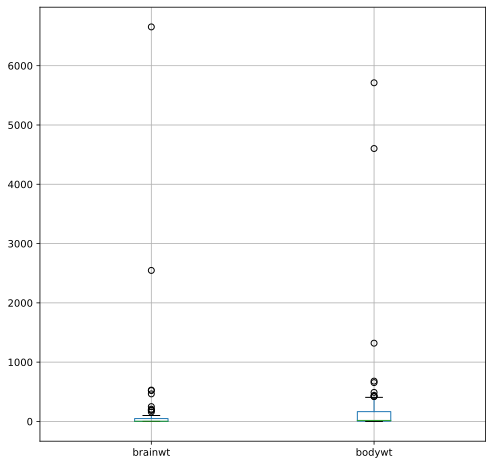

In [50]:
animals.boxplot(figsize=(8, 8));

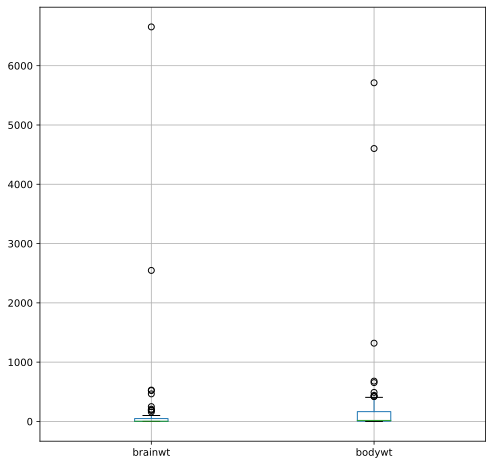

In [51]:
animals.boxplot(figsize=(8, 8));

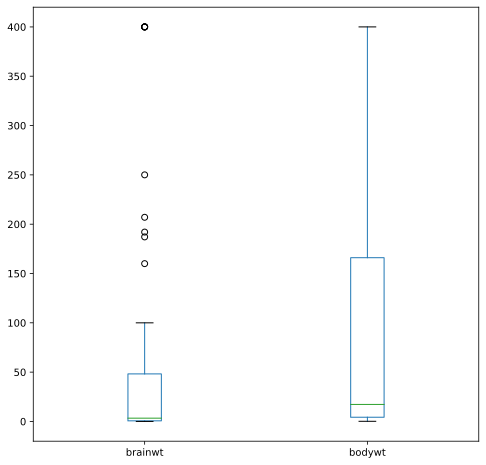

In [52]:
animals[['brainwt', 'bodywt']].clip(0, 400).plot(kind='box', figsize=(8, 8));

### 4.2 histogram

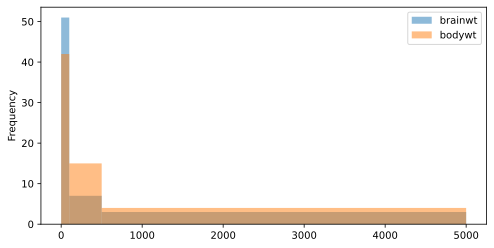

In [53]:
animals.plot(kind='hist', figsize=(8, 4), alpha=0.5, bins=[0, 100, 500, 5000]);

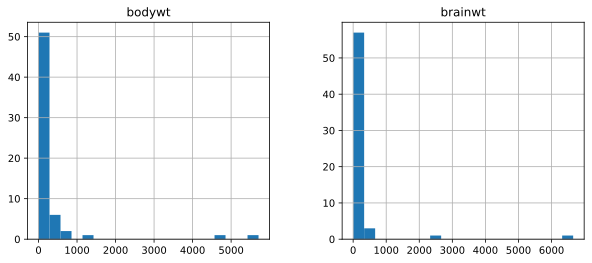

In [54]:
animals.hist(figsize=(10, 4), bins=20);

## 4.3 barplot + grid

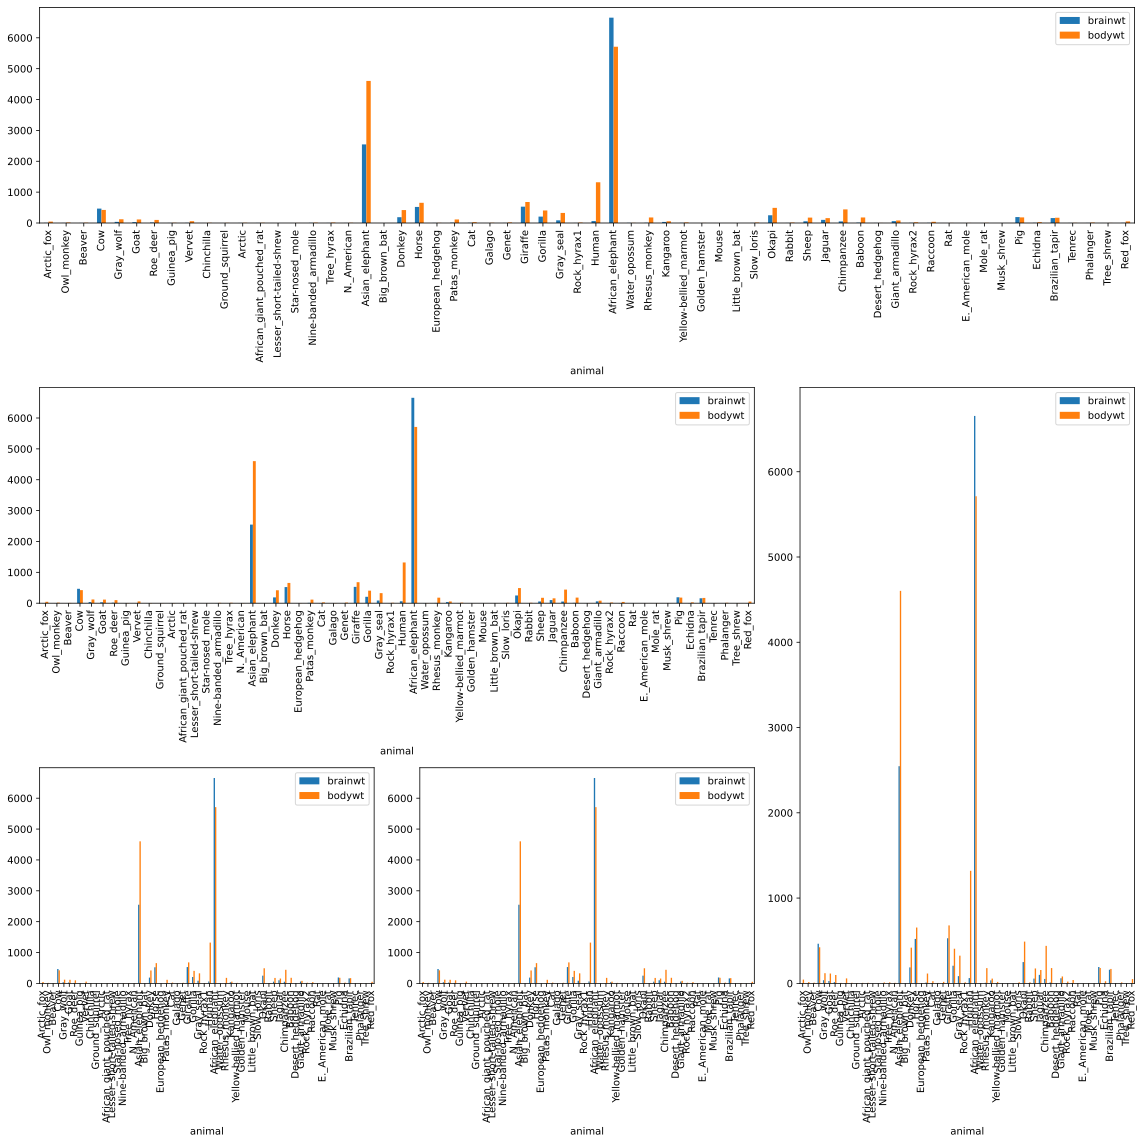

In [55]:
fig = plt.figure(figsize=(16, 16))
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3, 3), (2, 0))
ax5 = plt.subplot2grid((3, 3), (2, 1))

for ax in [ax1, ax2, ax3, ax4, ax5]:
    animals.set_index('animal').plot(kind='bar', ax=ax);
    plt.tight_layout()

plt.show()

## 4.4 timeseries

In [56]:
timeseries = pd.read_csv('https://data.open-power-system-data.org/time_series/2019-06-05/time_series_15min_singleindex.csv')

In [57]:
timeseries.columns

Index(['utc_timestamp', 'cet_cest_timestamp',
       'AT_load_actual_entsoe_transparency',
       'AT_load_forecast_entsoe_transparency', 'AT_price_day_ahead',
       'AT_solar_generation_actual', 'AT_wind_onshore_generation_actual',
       'BE_load_actual_entsoe_transparency',
       'BE_load_forecast_entsoe_transparency', 'BE_wind_onshore_capacity',
       'BE_wind_onshore_generation_actual', 'BE_wind_onshore_profile',
       'DE_load_actual_entsoe_transparency',
       'DE_load_forecast_entsoe_transparency', 'DE_solar_capacity',
       'DE_solar_generation_actual', 'DE_solar_profile', 'DE_wind_capacity',
       'DE_wind_generation_actual', 'DE_wind_profile',
       'DE_wind_offshore_capacity', 'DE_wind_offshore_generation_actual',
       'DE_wind_offshore_profile', 'DE_wind_onshore_capacity',
       'DE_wind_onshore_generation_actual', 'DE_wind_onshore_profile',
       'DE_50hertz_load_actual_entsoe_transparency',
       'DE_50hertz_load_forecast_entsoe_transparency',
       'DE_50h

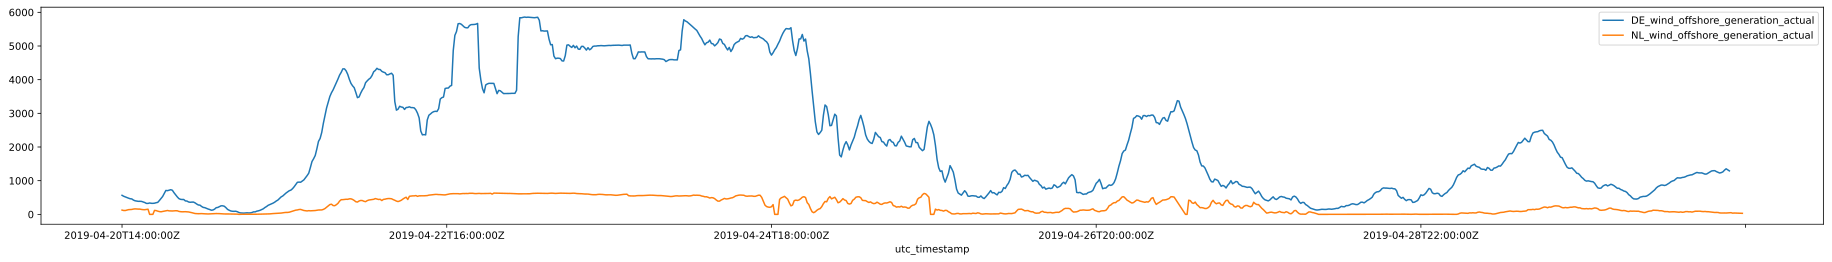

In [58]:
timeseries.set_index('utc_timestamp').iloc[-1000:,:].drop('cet_cest_timestamp', axis=1)[['DE_wind_offshore_generation_actual', 
                                                                                         'NL_wind_offshore_generation_actual']].plot(figsize=(32,4));

<div style="padding-top: 25px; float: right">
    <div>    
        <i>&nbsp;&nbsp;© Copyright by</i>
    </div>
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="125">
        </a>
    </div>
</div>